# Elon Musk Tweet's Sentiment Analisys

## Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

!pip install textblob
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [2]:
df=pd.read_csv("cleandata.csv")

In [3]:
df.head()

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!
4,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!


In [4]:
df.tail()

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
2663,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06,Just that manganese is an alternative to iron ...
2664,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20,Exactly
2665,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57,Your policies are directly responsible for the...
2666,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27,You should be voted out of office
2667,CB radios are free from govt/media control,11302,113429,2022-01-27 21:00:09,CB radios are free from govt/media control


In [5]:
df.shape

(2668, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tweets          2668 non-null   object
 1   Retweets        2668 non-null   int64 
 2   Likes           2668 non-null   int64 
 3   Date            2668 non-null   object
 4   Cleaned_Tweets  2668 non-null   object
dtypes: int64(2), object(3)
memory usage: 104.3+ KB


In [7]:
df.isnull().sum()

Tweets            0
Retweets          0
Likes             0
Date              0
Cleaned_Tweets    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df["Date"] = pd.to_datetime(df["Date"])

In [10]:
new_cols = ['Cleaned_Tweets', 'Likes','Retweets','Date', 'Day_of_Week', 'Month', 'Month_Name', 'Tweets']

In [11]:
df = df.reindex(columns=new_cols)

In [12]:
df["Day_of_Week"] = df["Date"].dt.day_name()

In [13]:
df['Month'] = pd.DatetimeIndex(df['Date']).month 

In [14]:
df['Month_Name']= pd.to_datetime(df['Month'], format='%m').dt.month_name()


In [15]:
df.loc[:, 'Day_of_Week':'Month_Name']

,Day_of_Week,Month,Month_Name
0,Thursday,10,October
1,Thursday,10,October
2,Thursday,10,October
3,Wednesday,10,October
4,Wednesday,10,October
...,...,...,...
2663,Thursday,1,January
2664,Thursday,1,January
2665,Thursday,1,January
2666,Thursday,1,January


In [16]:
df.head()

,Cleaned_Tweets,Likes,Retweets,Date,Day_of_Week,Month,Month_Name,Tweets
0,thanks,7021,209,2022-10-27 16:17:39,Thursday,10,October,@PeterSchiff 🤣 thanks
1,Absolutely,26737,755,2022-10-27 13:19:25,Thursday,10,October,@ZubyMusic Absolutely
2,Dear Twitter Advertisers,356623,55927,2022-10-27 13:08:00,Thursday,10,October,Dear Twitter Advertisers https://t.co/GMwHmInPAS
3,Meeting a lot of cool people at Twitter today!,195546,9366,2022-10-26 21:39:32,Wednesday,10,October,Meeting a lot of cool people at Twitter today!
4,Entering Twitter HQ – let that sink in!,1043592,145520,2022-10-26 18:45:58,Wednesday,10,October,Entering Twitter HQ – let that sink in! https:...


## Sentiment Analysis

In [23]:
def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity

def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

def getSentiment(value):
    if value < 0:
        return 'Negative'
    elif value > 0:
        return 'Positive'
    else:
        return 'Neutral'

In [24]:
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [25]:
df

,Cleaned_Tweets,Likes,Retweets,Date,Day_of_Week,Month,Month_Name,Tweets,Subjectivity,Polarity,Sentiment
0,thanks,7021,209,2022-10-27 16:17:39,Thursday,10,October,@PeterSchiff 🤣 thanks,0.200,0.2000,Positive
1,Absolutely,26737,755,2022-10-27 13:19:25,Thursday,10,October,@ZubyMusic Absolutely,0.900,0.2000,Positive
2,Dear Twitter Advertisers,356623,55927,2022-10-27 13:08:00,Thursday,10,October,Dear Twitter Advertisers https://t.co/GMwHmInPAS,0.000,0.0000,Neutral
3,Meeting a lot of cool people at Twitter today!,195546,9366,2022-10-26 21:39:32,Wednesday,10,October,Meeting a lot of cool people at Twitter today!,0.650,0.4375,Positive
4,Entering Twitter HQ – let that sink in!,1043592,145520,2022-10-26 18:45:58,Wednesday,10,October,Entering Twitter HQ – let that sink in! https:...,0.000,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
2663,Just that manganese is an alternative to iron ...,3173,171,2022-01-27 22:01:06,Thursday,1,January,@LimitingThe @baglino Just that manganese is a...,0.000,0.0000,Neutral
2664,Exactly,4234,145,2022-01-27 21:23:20,Thursday,1,January,@incentives101 @ICRicardoLara Exactly,0.250,0.2500,Positive
2665,Your policies are directly responsible for the...,6144,421,2022-01-27 21:13:57,Thursday,1,January,@ICRicardoLara Your policies are directly resp...,0.545,0.1800,Positive
2666,You should be voted out of office,7029,484,2022-01-27 21:12:27,Thursday,1,January,@ICRicardoLara You should be voted out of office,0.000,0.0000,Neutral


In [27]:
len(df['Date'])/len(df["Date"].map(pd.Timestamp.date).unique())      # günlük ortalama  tweet atılmaktadır

10.629482071713147

In [30]:
df['Subjectivity'].mean()

0.35237022876627977

In [31]:
df['Polarity'].mean()

0.12625008294021428

In [32]:
df.describe()

,Likes,Retweets,Month,Subjectivity,Polarity
count,2.668000e+03,2668.000000,2668.000000,2668.000000,2668.000000
mean,6.760142e+04,5598.058096,6.021739,0.352370,0.126250
std,1.955568e+05,21788.655734,2.550630,0.320268,0.278341
min,9.330000e+02,41.000000,1.000000,0.000000,-1.000000
25%,6.240000e+03,332.000000,4.000000,0.000000,0.000000
50%,1.559150e+04,847.500000,6.000000,0.345139,0.000000
75%,5.577650e+04,3366.250000,8.000000,0.600000,0.250000
max,4.780787e+06,681707.000000,10.000000,1.000000,1.000000


## Visualization

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

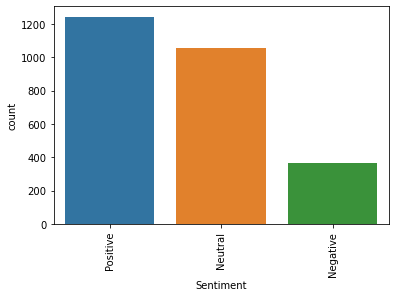

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.xticks(rotation=90)
sns.countplot(x = df['Sentiment'])

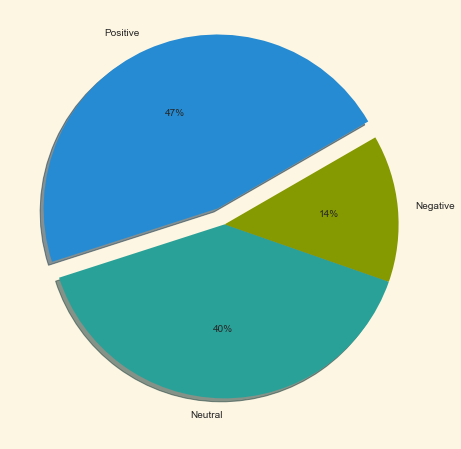

In [39]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(10,8))

values=df['Sentiment'].value_counts()
label=['Positive','Neutral','Negative']
explode=[0.1,0,0]

plt.pie(values,labels=label,explode=explode,autopct='%.0f%%',shadow=True,startangle=30)
plt.show()

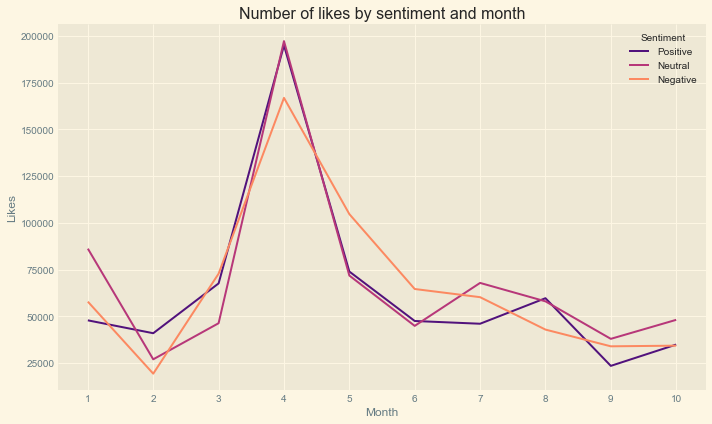

In [43]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

plt.figure(figsize = (10, 6))

months = df['Month'].unique()

sns.lineplot(x = 'Month', y = 'Likes', hue = 'Sentiment', ci = None, data = df, palette = 'magma')
plt.title('Number of likes by sentiment and month')
plt.xlabel('Month')
plt.xticks(ticks = [m for m in months])

plt.tight_layout()

In [54]:
vect=CountVectorizer(stop_words="english")
x=vect.fit_transform(df["Cleaned_Tweets"],df["Sentiment"])

In [55]:
df

,Cleaned_Tweets,Likes,Retweets,Date,Day_of_Week,Month,Month_Name,Tweets,Subjectivity,Polarity,Sentiment
0,thanks,7021,209,2022-10-27 16:17:39,Thursday,10,October,@PeterSchiff 🤣 thanks,0.200,0.2000,Positive
1,Absolutely,26737,755,2022-10-27 13:19:25,Thursday,10,October,@ZubyMusic Absolutely,0.900,0.2000,Positive
2,Dear Twitter Advertisers,356623,55927,2022-10-27 13:08:00,Thursday,10,October,Dear Twitter Advertisers https://t.co/GMwHmInPAS,0.000,0.0000,Neutral
3,Meeting a lot of cool people at Twitter today!,195546,9366,2022-10-26 21:39:32,Wednesday,10,October,Meeting a lot of cool people at Twitter today!,0.650,0.4375,Positive
4,Entering Twitter HQ – let that sink in!,1043592,145520,2022-10-26 18:45:58,Wednesday,10,October,Entering Twitter HQ – let that sink in! https:...,0.000,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
2663,Just that manganese is an alternative to iron ...,3173,171,2022-01-27 22:01:06,Thursday,1,January,@LimitingThe @baglino Just that manganese is a...,0.000,0.0000,Neutral
2664,Exactly,4234,145,2022-01-27 21:23:20,Thursday,1,January,@incentives101 @ICRicardoLara Exactly,0.250,0.2500,Positive
2665,Your policies are directly responsible for the...,6144,421,2022-01-27 21:13:57,Thursday,1,January,@ICRicardoLara Your policies are directly resp...,0.545,0.1800,Positive
2666,You should be voted out of office,7029,484,2022-01-27 21:12:27,Thursday,1,January,@ICRicardoLara You should be voted out of office,0.000,0.0000,Neutral
